Reference tutorial: Gaussian Processes for Dummies http://katbailey.github.io/post/gaussian-processes-for-dummies/

# Definition
A Gaussian process is a generalization of a multivariate Gaussian distribution to infinitely many variables. It is a collection of random variables, any finite number of which have a joint Gaussian distribution. Key points: (from Wiki)
+ In a Gaussian process, every point in some continuous input space is associated with a normally distributed random variable. (output)
+ Every finite collection of those random variables has a multivariate normal distribution, i.e. every finite linear combination of them is also normally distributed.
+ The distribution of a Gaussian process is the joint distribution of all those (infinitely many) random variables, and as such, it is a distribution over functions with a continuous domain, e.g. time or space. (*Since all the inputs and corresponding outputs can actually represent a function and the outputs are taken as random variables, a Gaussian process is indeed a distribution over functions.*)
+ Gaussian process is a special kind of **stochastic process**. As Wiki says,  a stochastic or random process is a mathematical object usually defined as a collection of random variables. Historically, the random variables were associated with or indexed by a set of numbers, usually viewed as points in time, giving the interpretation of a stochastic process representing numerical values of some system randomly changing over time.
+ A multivariate Gaussian distribution is specified by a mean vector and a covariance matrix, e.g., for a random vector $\mathbf{x}=[x_1,x_2,\cdots,x_n]$, we have $\mathbf{x}\sim\mathcal{N}(\boldsymbol\mu, \boldsymbol\Sigma)$. Similary, a Gaussian process is completely specified by its mean function and covariance function, defined as follows
\begin{align}
m(\mathbf{x}) &= \mathbb{E}[f(\mathbf{x})],\\
k(\mathbf{x}, \mathbf{x'}) &= \mathbb{E}[(f(\mathbf{x}) - m(\mathbf{x}))(f(\mathbf{x'}) - m(\mathbf{x'}))],
\end{align}
and write the Gaussian process as
\begin{equation}
f(\mathbf{x}) \sim \mathcal{GP}\left( m(\mathbf{x}), k(\mathbf{x}, \mathbf{x'}) \right)
\end{equation}

## What does the distribution over functions mean?
> Although it might seem difficult to represent a distrubtion over a function, it turns out that we only need to be able to define a distribution over the function’s values at a finite, but arbitrary, set of points. A GP assumes that any finite set of points are jointly Gaussian distributed. (*Machine Learning: A Probabilistic Perspective*).

>  the prior probability of a random event or an uncertain proposition is the unconditional probability that is assigned before any relevant evidence is taken into account (Wiki).

## If we have a series of $n$ inputs and assume their outputs are jointly Gaussian distributed, i.e., they have a $n$-dimensional multivariate Gaussain distribution. What might the $n$ outputs seem like?
For one-dimensional normal distribution $x\sim\mathcal{N}(\mu,\sigma^2)$, we can rewrite it into standard normals, like $x\sim \mu + \sigma \mathcal{N}(0,1)$. Then first generate a standard normal distribution and then get the distribution of $x$.
For multivariate Gaussian distribution, $\mathbf{x}\sim\mathcal{N}(\boldsymbol\mu, \boldsymbol\Sigma)$, the equivalent form is $\mathbf{x}= \boldsymbol\mu + \Lambda\mathbf{x_s}$, where $\mathbf{x_s}\sim\mathcal{N}(\mathbf{0}, \mathbf{I})$ and $\boldsymbol\Sigma=\boldsymbol{\Lambda}\boldsymbol{\Lambda}^T$. Here please note that for a multivariate Gaussian distribution with an identity covariance matrix, it just means each variable itself is normally distributed and they are independent. Therefore, it is easy to generate such distribution points with software.

> For a positive (semi)definite matrix $\mathbb{A}$, there exists a uniqe positive (semi)definite matrix $\mathbb{B}$ such that $\mathbb{B}^2=A$. ($\mathbb{A}$ may have multiple square root matrix. However, only one of them is also (semi)positive definite.)

However, here for multivariate Gaussian distribution, we don't requre $\boldsymbol{\Lambda}$ to be positive definite, as the relation always holds. The only necessity is $\boldsymbol\Sigma=\boldsymbol{\Lambda}\boldsymbol{\Lambda}^T$. To find $\boldsymbol{\Lambda}$, we can use the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) since the original covariance matrix $\boldsymbol\Sigma$ is positive definite.
>In linear algebra, the Cholesky decomposition or Cholesky factorization is a decomposition of a Hermitian, positive-definite matrix $\mathbb{A}$ into the product of a lower triangular matrix $\mathbb{L}$ and its conjugate transpose, which is useful e.g. for efficient numerical solutions and Monte Carlo simulations. $\mathbb{A}=\mathbb{L}\mathbb{L}^*$


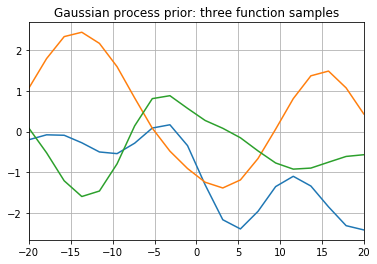

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# generate inputs
n = 20
x = np.linspace(-20, 20, n).reshape(-1, 1)
# define the squared exponential kernel (covariance function)
def kernel(x, sigmaf, l):
    # build the covariance matrix for a column vector x
    sqd = x ** 2 + x.T ** 2 - 2 * np.dot(x, x.T) # squared distance matrix
    return sigmaf ** 2 * np.exp(-sqd / (2 * l**2) )
sigmaf = 1
l = 5
cov = kernel(x, sigmaf, l) # covariance matrix
L = np.linalg.cholesky(cov)
# now the output will be y = 0 + L * standard multivariate Gaussian
# assume the mean function is always zero
y_prior = np.dot(L, np.random.normal(size=(n,3)))
# we have no observations but the prior information that this is a Gaussian process. So what may the output look like?
plt.figure()
plt.plot(x, y_prior)
plt.title('Gaussian process prior: three function samples')
plt.gca().set_xlim([-20, 20])
plt.grid()
plt.show()
